In [ ]:
# String basics
seq1 = 'ACGT'
seq1[1]
len(seq)
e = ''
s1 = 'ACTG'
s2 = 'GTCA'
print(s1 + s2)

In [10]:
# concatenate characters in a string using .join method
seqs = ['A', 'G', 'C', 'T']
print(''.join(seqs))

AGCT


In [11]:
import random
random.choice('ACTG')

'T'

In [13]:
# Generate random sequence of nucleotides
seq2 = '' # initiate an empty string
for _ in range(20):
    seq2 += random.choice('ACTG') # add a random nucleotide after every iteration
print(seq2)

GAACAACGAACATACTTCGA


In [16]:
# Another way to generate a string of nucleotides

seq3 = ''.join(random.choice('ACTG') for _ in range(29))
print(seq3)


TCTTACATCCGTTCGTACACACCTGGCCA


In [18]:
# get suffix
seq3[-10:]

'CACCTGGCCA'

In [19]:
# Function to find longest common prefix
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]

longestCommonPrefix('ACCATGT', 'ACCAGAC')
        

'ACCA'

In [22]:
# Function to see if two string match exactly

def exactMatch(s1, s2):
    if not len(s1) == len(s2):
        return False
    for i in range(len(s1)):
        if not s1[i] == s2[i]:
            return False
    return True
exactMatch('ACTGAC', 'ACTGC')

False

In [24]:
# Output complement for each base
complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
complement['G']

'C'

In [27]:
# Function that returns the reverse complement of the input sequence

def reverseComplement(s):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t    
    
reverseComplement('AGCTGCTATGCTGAT')

'ATCAGCATAGCAGCT'

In [28]:
## Downloading and parsing a genome
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2017-05-26 23:43:51--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net... 52.84.33.55, 52.84.33.92, 52.84.33.44, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|52.84.33.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.001s  

2017-05-26 23:43:54 (71.1 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [31]:
# function reads a fa file 

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip() # rstrip() removes any trailing white space
    return genome
genome = readGenome('lambda_virus.fa')
genome[:200]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCA'

In [32]:
len(genome)

48502

In [34]:
# Find frequency of each base 
# Use dictionary with base as key and frequency the value
counts = {'A':0, 'C':0, 'G':0, 'T':0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'T': 11986, 'G': 12820}


In [36]:
# Use collection moduel instead of dictionary
import collections
collections.Counter(genome)

Counter({'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986})

In [ ]:
Here we are working woth sequence reads

In [38]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2017-05-27 00:28:04--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net... 52.84.33.55, 52.84.33.117, 52.84.33.126, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|52.84.33.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.02s   

2017-05-27 00:28:05 (9.43 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [43]:
# Function that reads a fastq 
def readFastQ(filename):
    sequences = []
    quality = []
    with open(filename) as fh:
        while True: # read each line and store each relevant line to a variable
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            quality.append(qual)
        return sequences, quality
seqs, values = readFastQ('SRR835775_1.first1000.fastq')


In [42]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


In [44]:
print(values[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [48]:
# Function to convert phred33 score to Q

def phred33ToQ(qual):
    return ord(qual) - 33


In [49]:
phred33ToQ('#')

2

In [50]:
phred33ToQ('J')

41

In [59]:
# Function creates histogram of quality score
def createHistQual(qualities):
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHistQual(values)
print(h)            
    

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


<Container object of 50 artists>

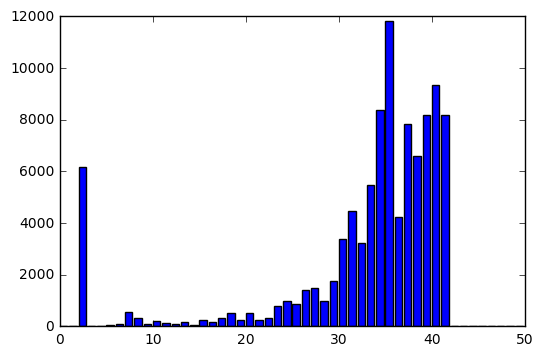

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)



In [ ]:
Analyzing sequence by position: 
    GC content

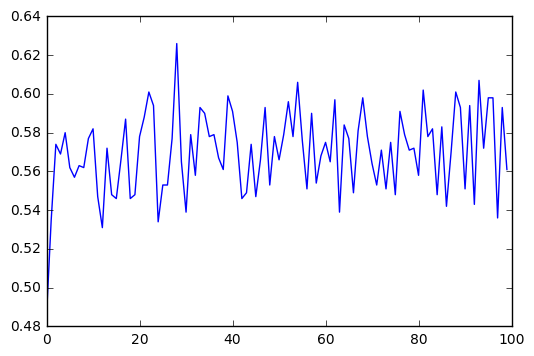

In [77]:
def findGCbyPosition(reads):
    gc = [0]*100
    totals = [0]*100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
            
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc
gc = findGCbyPosition(seqs) 
plt.plot(range(len(gc)), gc) 
plt.show()

In [ ]:
Look at distribution of bases in this sequence

In [82]:
import collections
count  = collections.Counter(seq)

for seq in seqs:
    count.update(seq)
print(count)

Counter({'G': 28766, 'C': 28307, 'T': 21861, 'A': 21148, 'N': 18})
